In [43]:
!pip uninstall tensorflow
!pip install tensorflow

Traceback (most recent call last):



In [44]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(8, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 conv2d_20 (Conv2D)          (None, 124, 124, 16)      18448     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 16)       

In [47]:
# get a list of layers from model
layer_outputs = [layer.output for layer in model.layers[1:]]

In [48]:
# create a visualization model
visualize_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [49]:
# load image for prediction
img=load_img('/content/00.jpg',target_size=(128,128))

In [50]:
x=img_to_array(img)

In [51]:
x.shape

(128, 128, 3)

In [52]:
# reshape image
x=x.reshape((1,128,128,3))
print(x.shape)

(1, 128, 128, 3)


In [53]:
# rescale image
x=x/255

In [54]:
# get all layers feature mapes for image
feature_maps=visualize_model.predict(x)
print(len(feature_maps))

11


In [55]:
# show names of layers available in model
layer_names = [layer.name for layer in model.layers]
print(layer_names)

['conv2d_19', 'conv2d_20', 'max_pooling2d_12', 'conv2d_21', 'max_pooling2d_13', 'conv2d_22', 'max_pooling2d_14', 'conv2d_23', 'max_pooling2d_15', 'flatten_5', 'dense_10', 'dense_11']


In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(1, 124, 124, 16)
(1, 62, 62, 16)
(1, 60, 60, 32)
(1, 30, 30, 32)
(1, 28, 28, 16)
(1, 14, 14, 16)
(1, 12, 12, 8)
(1, 6, 6, 8)
(1, 288)
(1, 512)
(1, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


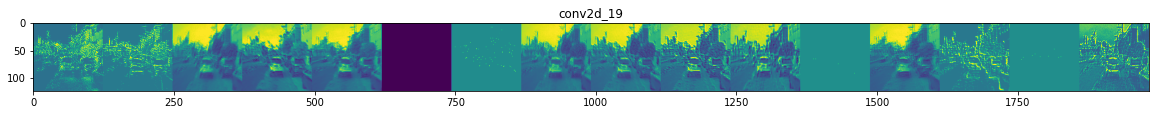

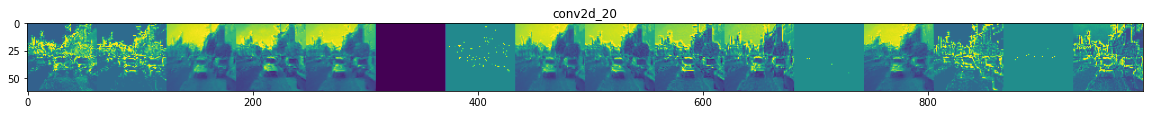

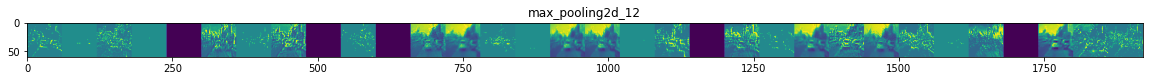

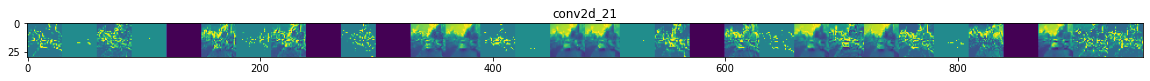

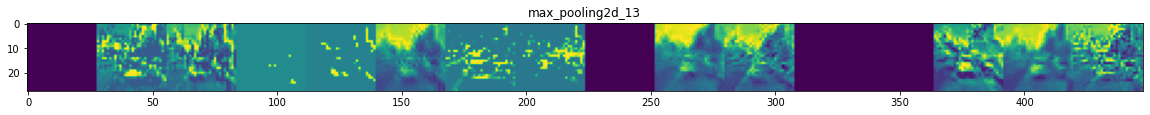

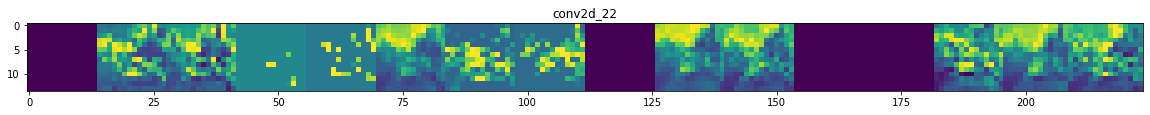

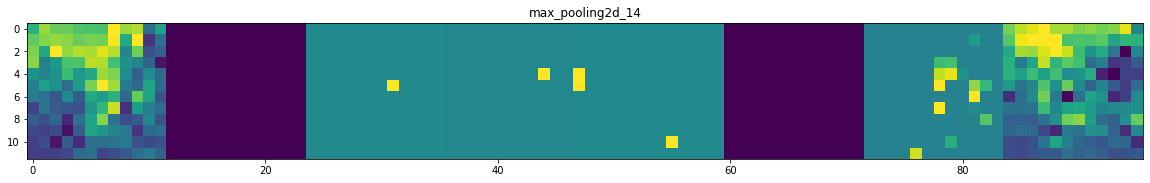

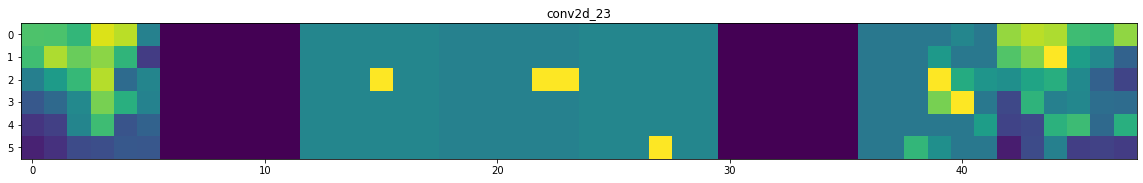

In [57]:
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(feature_maps.shape)
  if len(feature_maps.shape) == 4:
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size*channels))
    for i in range(channels):
      x =feature_maps[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x,0,255).astype('uint8')
      # tile each filter into this big horizontal grid
      display_grid[:,i*size:(i+1)*size]=x

    scale = 20./channels
    plt.figure(figsize=(scale*channels,scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')

In [58]:
filters = model.layers[2].get_weights()

In [59]:
print(filters)

[]


conv2d_19
128


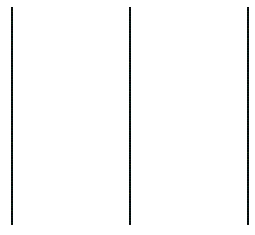

conv2d_20
16


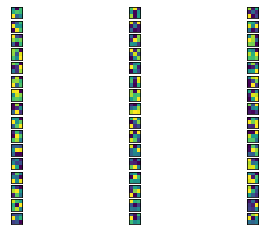

conv2d_21
32


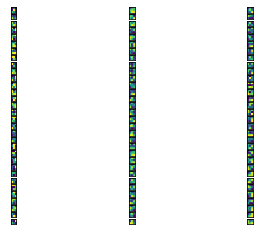

conv2d_22
16


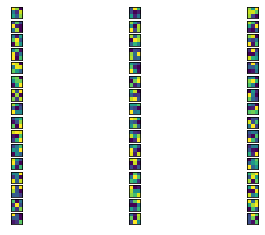

conv2d_23
8


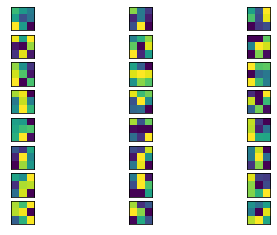

In [60]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()